# Seattle Airbnb Analysis 

Author: Zhen-Yen Chan

Version: 2.0

Date created: 07/07/2022

Last updated: 22/07/2022

This notebook reads in Airbnb listings and calendar data, trains a linear regression model and produces visualisations to answer 3 key questions about the Airbnb rental landscape in Seattle. The CRISP-DM process is followed.

## 1. Business Understanding

We aim to answer the following business questions for prospective Airbnb hosts in Seattle:

1.	What type of property should I buy and what listing settings should I use?

2.	Which times of the year should I rent out my property?

3.	How do I get the best overall reviews?

### 1.1 Problem Formulation

We formulate the following data problems and use machine learning and data visualisation approaches:

1.	What type of property listing has the highest price? Use linear regression to predict average daily price over 1 year

2.	Which months of the year are the busiest? Which months of the year have the highest prices? Use plots to visualise availability rate and average listing price for each month

3.	Which review criteria contribute the most to overall review ratings? Use plots to identify criteria that are most correlated with review_scores_rating

## 2. Data Understanding
We use two datasets from Seattle Airbnb Open Data:
1. listings.csv includes full descriptions and average review score for each listing
2. calendar.csv includes the price and availability of each listing for each day

Source: https://www.kaggle.com/datasets/airbnb/seattle?resource=download

Data dictionary: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing

### 2.1 First look at the data

In [1]:
# import libraries
import numpy as np                               
import pandas as pd                               
import matplotlib.pyplot as plt                  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# adjust output display size
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)  

In [2]:
# load the listings dataset
df_listings = pd.read_csv("listings.csv")
df_listings.head(15)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [3]:
# get data types and count of missing values
df_listings.info()

# we need to remove irrelevant columns for modelling

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
# number of rows and columns
df_listings.shape

(3818, 92)

In [5]:
# get the date range and number of unique listings and hosts

# convert to datetime format
df_listings['last_scraped'] = pd.to_datetime(df_listings['last_scraped'], format='%Y-%m-%d')
# get the first and last date 
first_date_listings = df_listings['last_scraped'].min()
last_date_listings = df_listings['last_scraped'].max()
#print(first_date_listings, last_date_listings)

# find the number of unique listings and hosts
num_listings_listings = df_listings['id'].nunique()
num_hosts = df_listings['host_id'].nunique()

print(f"The listings dataset provides information on {num_listings_listings} properties run by {num_hosts} hosts as of {first_date_listings}.")

The listings dataset provides information on 3818 properties run by 2751 hosts as of 2016-01-04 00:00:00.


In [6]:
# load the calendar dataset
df_calendar = pd.read_csv("calendar.csv")
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
# get data types and count of missing values
df_calendar.info()

# we need to change data types for listing_id, available and price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
# number of rows and columns
df_calendar.shape

(1393570, 4)

In [9]:
# get the date range and number of unique listings

# convert to datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'], format='%Y-%m-%d')
# get the first and last date 
first_date_calendar = df_calendar['date'].min()
last_date_calendar = df_calendar['date'].max()

# find the number of unique listings 
num_listings_calendar = df_calendar['listing_id'].nunique()

print(f"The calendar dataset provides information on {num_listings_calendar} properties from {first_date_calendar} to {last_date_calendar}")

The calendar dataset provides information on 3818 properties from 2016-01-04 00:00:00 to 2017-01-02 00:00:00


## 3. Data Preparation

### 3.1 Select and reformat columns

In [10]:
# select relevant columns for modelling

#df_listings.columns
columns_for_q1 = ['id','price', 'neighbourhood','property_type', 'room_type','accommodates','bathrooms','bedrooms','beds'
                  , 'instant_bookable','cancellation_policy', 'require_guest_phone_verification']

df_listings_1 = df_listings[columns_for_q1]
df_listings_1.dtypes

# we need to transform price
# also change require_guest_phone_verification, instant_bookable to boolean

id                                    int64
price                                object
neighbourhood                        object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
instant_bookable                     object
cancellation_policy                  object
require_guest_phone_verification     object
dtype: object

In [11]:
# function to convert t/f to True/False
def get_indicator(column):
    if column=='t':
        return True
    else: 
        return False
    
# function to clean price-related variables
def clean_price(column):
    # convert to string
    column = str(column)
    # replace symbols
    column = column.replace('$','').replace(',','')
    # convert to float
    column = float(column)
    return column

In [12]:
# convert to string
df_listings_1['id'] = df_listings_1['id'].astype(str)

# clean price variables
df_listings_1['price'] = df_listings_1['price'].apply(clean_price)

# convert to indicator columns
df_listings_1['require_guest_phone_verification'] = df_listings_1['require_guest_phone_verification'].apply(get_indicator)
df_listings_1['instant_bookable'] = df_listings_1['instant_bookable'].apply(get_indicator)

# check data types
# df_listings_1.dtypes

/home/chanzb/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/chanzb/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/chanzb/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [13]:
# make a copy of df_calendar
df_calendar_1 = df_calendar
# convert to string
df_calendar_1['listing_id'] = df_calendar_1['listing_id'].astype(str)
# convert to indicator
df_calendar_1['available'] = df_calendar_1['available'].apply(get_indicator)
# clean price variable
df_calendar_1['price'] = df_calendar_1['price'].apply(clean_price)
# check data types
# df_calendar_1.dtypes

In [14]:
pd.crosstab(index=df_calendar_1['available'], columns='% observations', normalize='columns')

col_0,% observations
available,
False,0.32939
True,0.67061


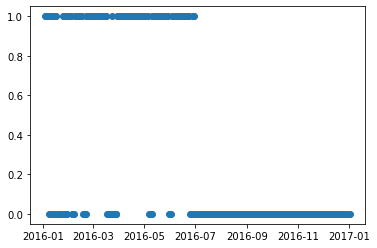

In [15]:
# deep dive into one listing
#df_calendar_1['listing_id'].unique()
example_listing = df_calendar_1[df_calendar_1['listing_id']=='19619']
# plot availability over time
plt.scatter(example_listing['date'], example_listing['available'])

/home/chanzb/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


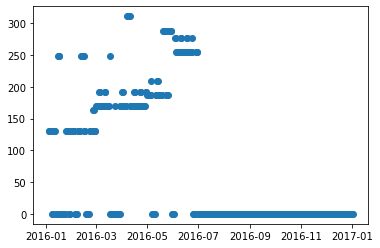

In [16]:
# plot price over time
example_listing['price'].fillna(0, inplace=True)
plt.scatter(example_listing['date'], example_listing['price'])

### 3.2 Create target variable for q1 (average daily price) 

Approach: As daily prices for each listing vary over the year, it would be more useful to predict the **average daily price** over 1 year than on any single date. For listings where there are no prices available in df_calendar, impute the price value from df_listings_1 as the average daily price.

In [17]:
# calculate average daily price and total number of occupied days for each listing
df2 = df_calendar_1.groupby('listing_id').agg(
        average_daily_price = pd.NamedAgg(column='price', aggfunc='mean'))
df2 = df2.reset_index()
df2.head()

# average daily price has some missing values that need to be imputed

,listing_id,average_daily_price
0,10000273,182.080925
1,1000883,102.916667
2,10012724,25.000000
3,10015967,NaN
4,10019082,131.696629


In [18]:
# merge with the listings dateframe
df_merged = df_listings_1.merge(df2, left_on='id', right_on='listing_id')
# df_merged.shape
df_merged.head()

,id,price,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,instant_bookable,cancellation_policy,require_guest_phone_verification,listing_id,average_daily_price
0,241032,85.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,False,moderate,False,241032,85.000000
1,953595,150.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,False,strict,True,953595,170.931271
2,3308979,975.0,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,False,strict,False,3308979,1301.818182
3,7421966,100.0,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,False,flexible,False,7421966,100.000000
4,278830,450.0,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,False,strict,False,278830,462.739726


In [19]:
# impute missing values for average_daily_price with the price column from df_listings_1
df_merged['average_daily_price'] = df_merged['average_daily_price'].fillna(df_merged['price'])
# check for missing values
df_merged['average_daily_price'].isna().sum()

0

In [20]:
df_merged['average_daily_price'].describe()

count    3818.000000
mean      136.528967
std        98.686317
min        20.000000
25%        75.995370
50%       109.000000
75%       163.837135
max      1301.818182
Name: average_daily_price, dtype: float64

In [21]:
# explore the highest earning listings
df_merged[df_merged['average_daily_price']>1000].sort_values('average_daily_price', ascending=False)

,id,price,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,instant_bookable,cancellation_policy,require_guest_phone_verification,listing_id,average_daily_price
2,3308979,975.0,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,False,strict,False,3308979,1301.818182
239,7733192,749.0,Queen Anne,House,Entire home/apt,8,3.5,3.0,3.0,False,moderate,False,7733192,1010.977716


In [22]:
# drop columns not used for modelling
df_1 = df_merged.drop(columns=['id', 'price', 'listing_id'])
# df_1.columns
df_1.dtypes

# df_1 will be used to fit the linear regression model

neighbourhood                        object
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
instant_bookable                       bool
cancellation_policy                  object
require_guest_phone_verification       bool
average_daily_price                 float64
dtype: object

### 3.3 Exploratory data analysis

In [23]:
# descriptive statistics for numeric features
display(df_1.describe())

,accommodates,bathrooms,bedrooms,beds,average_daily_price
count,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000
mean,3.349398,1.259469,1.307712,1.735394,136.528967
std,1.977599,0.590369,0.883395,1.139480,98.686317
min,1.000000,0.000000,0.000000,1.000000,20.000000
25%,2.000000,1.000000,1.000000,1.000000,75.995370
50%,3.000000,1.000000,1.000000,1.000000,109.000000
75%,4.000000,1.000000,2.000000,2.000000,163.837135
max,16.000000,8.000000,7.000000,15.000000,1301.818182


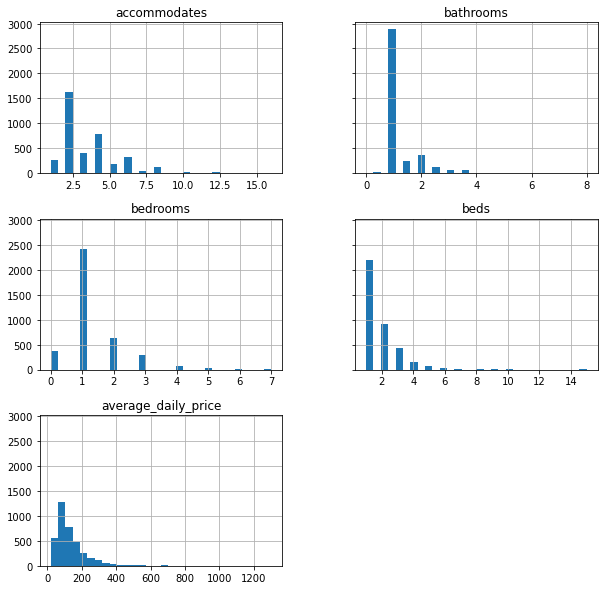

In [24]:
# plot distribution of numeric features
hist = df_1.hist(bins=30, sharey=True, figsize=(10, 10))

In [25]:
# descriptive statistics for categorical features
display(df_1.describe(include=object))

,neighbourhood,property_type,room_type,cancellation_policy
count,3402,3817,3818,3818
unique,81,16,3,3
top,Capitol Hill,House,Entire home/apt,strict
freq,351,1733,2541,1417


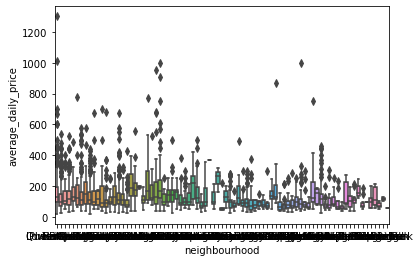

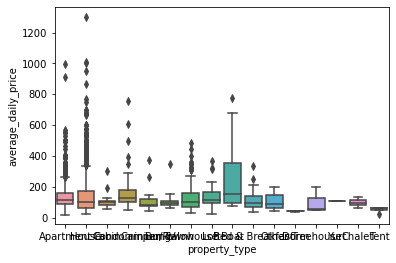

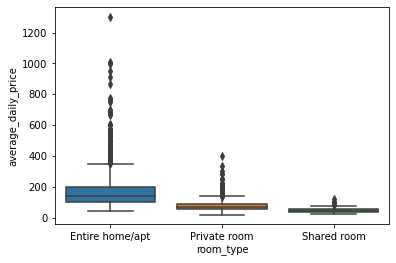

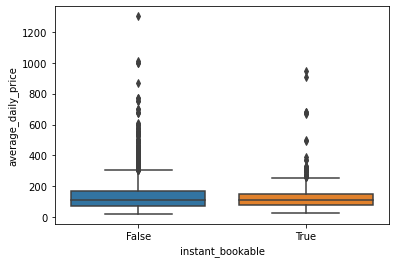

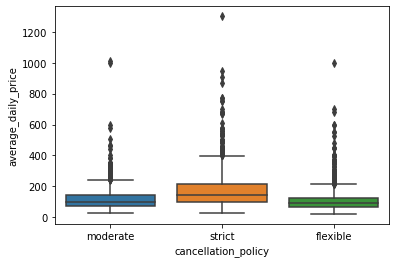

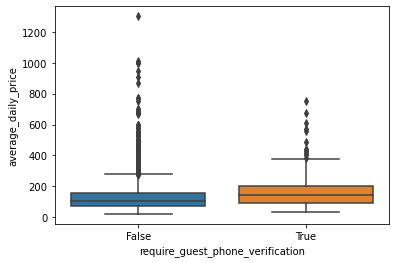

In [26]:
# box plots for each categorical feature against the target
cat_bool_vars = df_1.select_dtypes(include=['object', 'boolean']).columns
for i, col in enumerate(cat_bool_vars):
    plt.figure(i)
    sns.boxplot(data=df_1, x=col, y='average_daily_price')

In [27]:
# distribution of each categorical and boolean feature 
for column in cat_bool_vars:
    CT = pd.crosstab(index=df_1[column], columns='% observations', normalize='columns')
    display(CT.sort_values('% observations', ascending=False)*100)
 #   display(pd.crosstab(index=df_q1[column], columns='% observations', normalize='columns')*100)
    
# the dataset is unbalanced across most variables

col_0,% observations
neighbourhood,
Capitol Hill,10.317460
Ballard,6.261023
Belltown,5.996473
Minor,5.643739
Queen Anne,5.496767
Fremont,4.350382
Wallingford,4.203410
University District,3.145209
First Hill,3.086420


col_0,% observations
property_type,
House,45.402148
Apartment,44.747184
Townhouse,3.091433
Condominium,2.384071
Loft,1.047943
Bed & Breakfast,0.969348
Other,0.576369
Cabin,0.550170
Bungalow,0.340582


col_0,% observations
room_type,
Entire home/apt,66.553169
Private room,30.382399
Shared room,3.064432


col_0,% observations
instant_bookable,
False,84.520691
True,15.479309


col_0,% observations
cancellation_policy,
strict,37.113672
moderate,32.765846
flexible,30.120482


col_0,% observations
require_guest_phone_verification,
False,90.178104
True,9.821896


### 3.5 Deal with missing values

In [28]:
# find the percentage of missing values for each column that has missing values
pct_na = df_1.isnull().mean()*100
columns_with_na = pct_na[pct_na>0].sort_values(ascending=False)
columns_with_na

neighbourhood    10.895757
bathrooms         0.419068
bedrooms          0.157150
property_type     0.026192
beds              0.026192
dtype: float64

<AxesSubplot:title={'center':'% missing values per column'}>

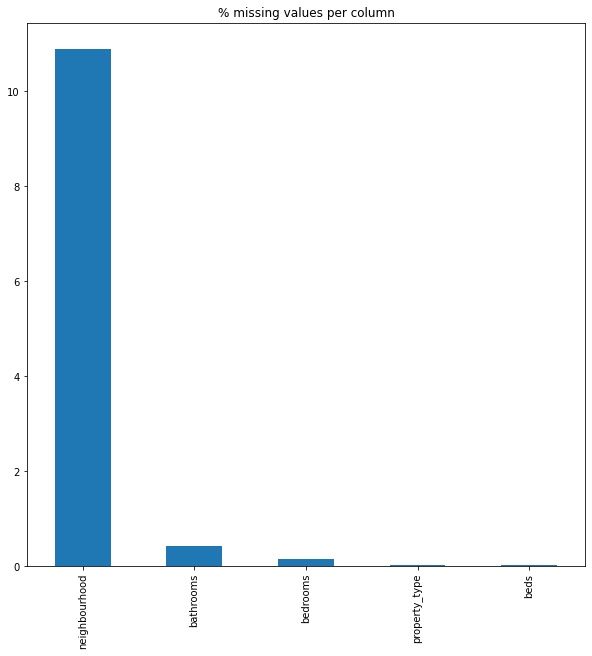

In [29]:
# plot the results
plt.figure(figsize = (10,10))
columns_with_na.plot.bar(title='% missing values per column')

In [30]:
# impute numerical variables with mean 
num_vars = df_1.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df_1[col].fillna((df_1[col].mean()), inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   neighbourhood                     3402 non-null   object 
 1   property_type                     3817 non-null   object 
 2   room_type                         3818 non-null   object 
 3   accommodates                      3818 non-null   int64  
 4   bathrooms                         3818 non-null   float64
 5   bedrooms                          3818 non-null   float64
 6   beds                              3818 non-null   float64
 7   instant_bookable                  3818 non-null   bool   
 8   cancellation_policy               3818 non-null   object 
 9   require_guest_phone_verification  3818 non-null   bool   
 10  average_daily_price               3818 non-null   float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 434.8+ KB


In [31]:
# create dummy coded columns for categorical variables
cat_vars = df_1.select_dtypes(include='object').columns
df_q1 = df_1
for col in cat_vars:
    df_q1 = pd.concat([df_q1.drop(col, axis=1), pd.get_dummies(df_q1[col], prefix=col, prefix_sep='_', dummy_na = True
                                                               , drop_first=True)], axis=1)

In [32]:
df_q1.head()

# the data is ready for modelling

,accommodates,bathrooms,bedrooms,beds,instant_bookable,require_guest_phone_verification,average_daily_price,neighbourhood_Arbor Heights,neighbourhood_Atlantic,neighbourhood_Ballard,neighbourhood_Belltown,neighbourhood_Bitter Lake,neighbourhood_Brighton,neighbourhood_Broadview,neighbourhood_Broadway,neighbourhood_Bryant,neighbourhood_Capitol Hill,neighbourhood_Cedar Park,neighbourhood_Central Business District,neighbourhood_Columbia City,neighbourhood_Crown Hill,neighbourhood_Dunlap,neighbourhood_Eastlake,neighbourhood_Fairmount Park,neighbourhood_Fauntleroy,neighbourhood_First Hill,neighbourhood_Fremont,neighbourhood_Gatewood,neighbourhood_Genesee,neighbourhood_Georgetown,neighbourhood_Green Lake,neighbourhood_Greenwood,neighbourhood_Haller Lake,neighbourhood_Harrison/Denny-Blaine,neighbourhood_High Point,neighbourhood_Highland Park,neighbourhood_Holly Park,neighbourhood_Industrial District,neighbourhood_Interbay,neighbourhood_International District,neighbourhood_Laurelhurst,neighbourhood_Leschi,neighbourhood_Licton Springs,neighbourhood_Lower Queen Anne,neighbourhood_Madison Park,neighbourhood_Madrona,neighbourhood_Magnolia,neighbourhood_Maple Leaf,neighbourhood_Mathews Beach,neighbourhood_Meadowbrook,neighbourhood_Minor,neighbourhood_Montlake,neighbourhood_Mount Baker,neighbourhood_North Admiral,neighbourhood_North Beach/Blue Ridge,neighbourhood_North Beacon Hill,neighbourhood_North College Park,neighbourhood_North Delridge,neighbourhood_Olympic Hills,neighbourhood_Phinney Ridge,neighbourhood_Pike Market,neighbourhood_Pike Place Market,neighbourhood_Pinehurst,neighbourhood_Pioneer Square,neighbourhood_Portage Bay,neighbourhood_Queen Anne,neighbourhood_Rainier Beach,neighbourhood_Ravenna,neighbourhood_Riverview,neighbourhood_Roosevelt,neighbourhood_Roxhill,neighbourhood_Seaview,neighbourhood_Seward Park,neighbourhood_South Beacon Hill,neighbourhood_South Delridge,neighbourhood_South Lake Union,neighbourhood_South Park,neighbourhood_Stevens,neighbourhood_The Junction,neighbourhood_University District,neighbourhood_Victory Heights,neighbourhood_View Ridge,neighbourhood_Wallingford,neighbourhood_Wedgewood,neighbourhood_Westlake,neighbourhood_Windermere,neighbourhood_Yesler Terrace,neighbourhood_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan
0,4,1.0,1.0,1.0,False,False,85.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4,1.0,1.0,1.0,False,True,170.931271,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,11,4.5,5.0,7.0,False,False,1301.818182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3,1.0,0.0,2.0,False,False,100.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,2.0,3.0,3.0,False,False,462.739726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


## 4. Modelling and Evaluation

In [33]:
# split data and train model

X = df_q1.drop('average_daily_price', axis=1)
y = df_q1['average_daily_price']

# Create training and test sets of data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)
# Instantiate a Linear Regression model with normalized data
lm_model_1 = LinearRegression(normalize=True)
# Fit your model to the training data
lm_model_1.fit(X_train_1, y_train_1)
# Predict the response for the training data and the test data
y_train_preds_1 = lm_model_1.predict(X_train_1)
y_test_preds_1 = lm_model_1.predict(X_test_1)
# Obtain an rsquared value for both the training and test data
train_score_1 = r2_score(y_train_1, y_train_preds_1)
test_score_1 =  r2_score(y_test_1, y_test_preds_1)

# Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score_1, test_score_1))

The rsquared on the training data was 0.6239185613111703.  The rsquared on the test data was -5.9001179606289876e+25.


/home/chanzb/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [34]:
# display coefficient estimates
def coef_weights(X_train, lm_model):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df_1 = coef_weights(X_train_1, lm_model_1)

#A quick look at the top results
coef_df_1.head(10)

,est_int,coefs,abs_coefs
59,neighbourhood_Pike Market,1.900889e+16,1.900889e+16
69,neighbourhood_Roxhill,-4.847531e+15,4.847531e+15
88,property_type_Boat,1.346283e+02,1.346283e+02
75,neighbourhood_South Park,-1.142117e+02,1.142117e+02
36,neighbourhood_Industrial District,1.140445e+02,1.140445e+02
94,property_type_Dorm,-1.089735e+02,1.089735e+02
31,neighbourhood_Haller Lake,-9.622701e+01,9.622701e+01
19,neighbourhood_Crown Hill,-9.147789e+01,9.147789e+01
73,neighbourhood_South Delridge,-8.659996e+01,8.659996e+01
55,neighbourhood_North College Park,-8.270321e+01,8.270321e+01


In [35]:
# try different cutoffs for number of missing values allowed in the used columns
# lower cutoff values mean more predictors in the model (more dummy variables)
# the function below outputs only the optimal model results

def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]] # uses absolute number of non-missing values, not proportion
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get) # get highest r2 from the dictionary 'results'

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

/home/chanzb/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/home/chanzb/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

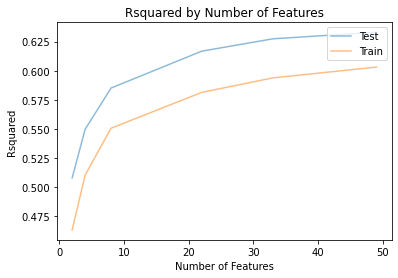

49
For the optimal model, the train rsquared was 0.6030706083627537 and the test rsquared was 0.6330139501797638.


/home/chanzb/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [36]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 25]
# pass your X and y to the model for testing
test_score_2, train_score_2, lm_model_2, X_train_2, X_test_2, y_train_2, y_test_2 = find_optimal_lm_mod(X, y, cutoffs)
print(X_train_2.shape[1]) #Number of columns
print("For the optimal model, the train rsquared was {} and the test rsquared was {}.".format(
        train_score_2[np.argmax(test_score_2)], test_score_2[np.argmax(test_score_2)]))

In [37]:
# display coefficients of the optimal model
coef_df_2 = coef_weights(X_train_2, lm_model_2)

## 5. Results

### Referring back to 1.1 Problem Formulation

We formulate the following data problems and use machine learning and data visualisation approaches:

1.	What type of property listing has the highest price? Use linear regression to predict average daily price over 1 year

2.	Which months of the year are the busiest? Which months of the year have the highest prices? Use plots to visualise availability rate and average listing price for each month

3.	Which review criteria contribute the most to overall review ratings? Use plots to identify criteria that are most correlated with review_scores_rating

### Question 1: What type of property listing has the highest price? 

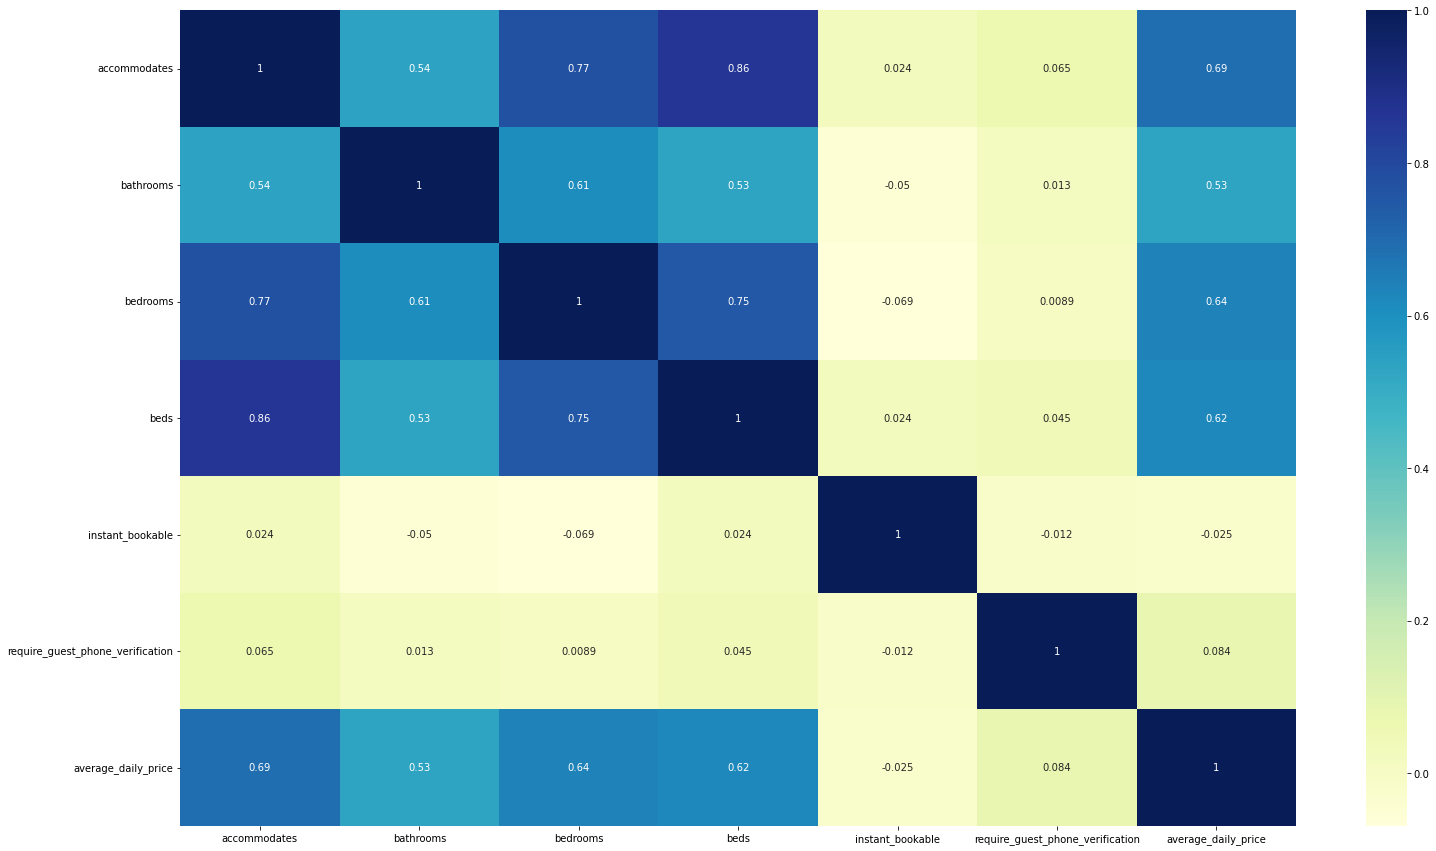

In [38]:
# correlation heatmap
plt.figure(figsize = (25,15))
dataplot = sns.heatmap(df_1.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [39]:
# dummy column to colour code coefficients as positive and negative
coef_df_2['positive']=coef_df_2['coefs']>0
coef_df_2.head(20)

,est_int,coefs,abs_coefs,positive
46,room_type_Shared room,-71.620847,71.620847,False
30,neighbourhood_Pike Place Market,57.414712,57.414712,True
8,neighbourhood_Belltown,50.020290,50.020290,True
11,neighbourhood_Central Business District,49.970687,49.970687,True
6,neighbourhood_Atlantic,-35.078831,35.078831,False
1,bathrooms,34.559114,34.559114,True
45,room_type_Private room,-33.913777,33.913777,False
34,neighbourhood_Seward Park,-31.278731,31.278731,False
2,bedrooms,30.583336,30.583336,True
20,neighbourhood_Lower Queen Anne,30.533564,30.533564,True


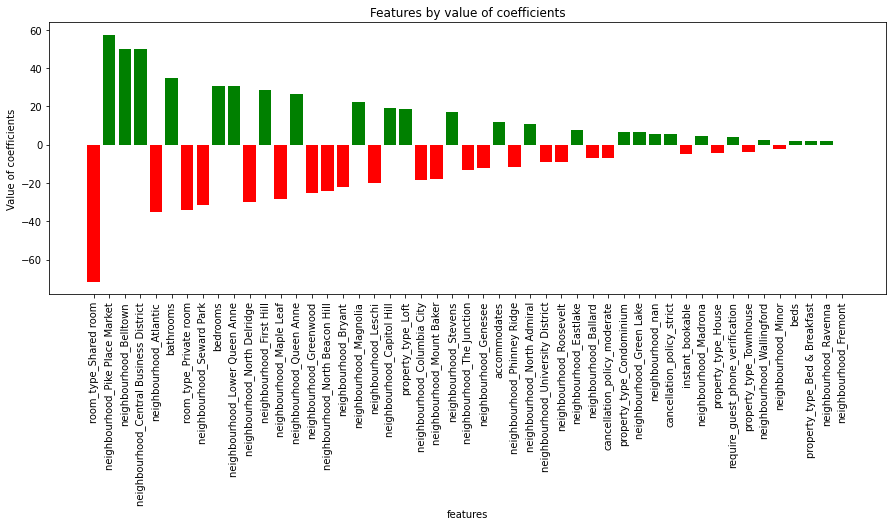

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the value of coefficients in decreasing order of absolute value
plt.figure(figsize = (15,5))
plt.bar(coef_df_2['est_int'], coef_df_2['coefs'], color=coef_df_2.positive.map({True: 'green', False: 'red'}))
plt.xlabel('features')
plt.xticks(coef_df_2['est_int'], rotation = 90)
plt.ylabel('Value of coefficients')
plt.title('Features by value of coefficients')
plt.show()
plt.savefig("size_of_coefficients.jpg")

In [41]:
# find out the baseline category of each categorical variable
sorted(df_1['room_type'].dropna().unique())[0] # Entire home/apt
sorted(df_1['neighbourhood'].dropna().unique())[0] # Alki
sorted(df_1['property_type'].dropna().unique())[0] # Apartment

'Apartment'

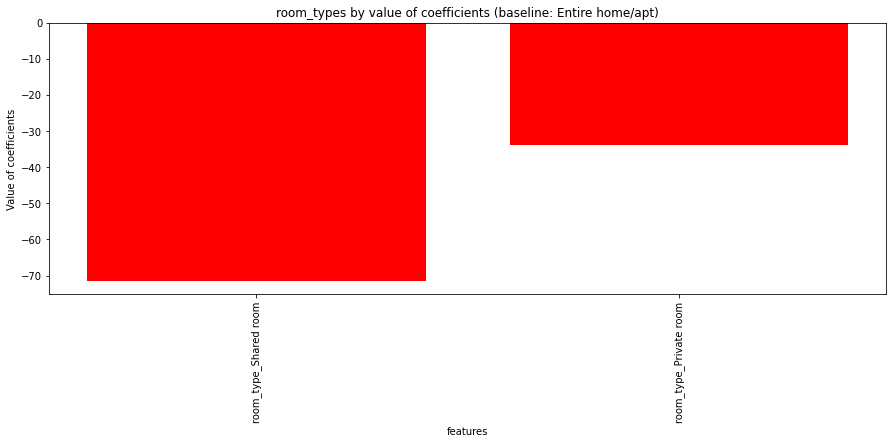

<Figure size 432x288 with 0 Axes>

In [42]:
# investigate room types
room_type_coefs = coef_df_2[coef_df_2['est_int'].str.contains('room_type')]
plt.figure(figsize = (15,5))
plt.bar(room_type_coefs['est_int'], room_type_coefs['coefs']
        , color=room_type_coefs.positive.map({True: 'green', False: 'red'}))
plt.xlabel('features')
plt.xticks(room_type_coefs['est_int'], rotation = 90)
plt.ylabel('Value of coefficients')
plt.title('room_types by value of coefficients (baseline: Entire home/apt)')
plt.show()
plt.savefig("room_type.jpg")

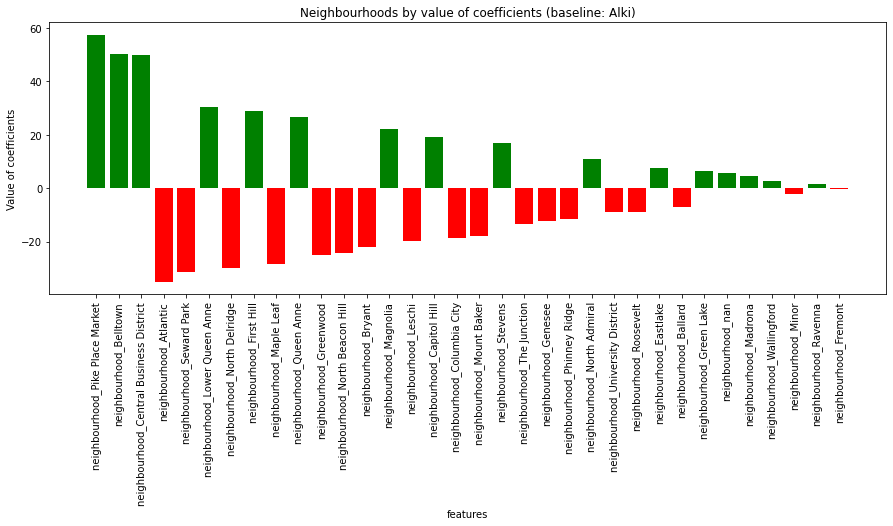

<Figure size 432x288 with 0 Axes>

In [43]:
# investigate neighbourhoods
neighbourhood_coefs = coef_df_2[coef_df_2['est_int'].str.contains('neighbourhood')]
plt.figure(figsize = (15,5))
plt.bar(neighbourhood_coefs['est_int'], neighbourhood_coefs['coefs']
        , color=neighbourhood_coefs.positive.map({True: 'green', False: 'red'}))
plt.xlabel('features')
plt.xticks(neighbourhood_coefs['est_int'], rotation = 90)
plt.ylabel('Value of coefficients')
plt.title('Neighbourhoods by value of coefficients (baseline: Alki)')
plt.show()
plt.savefig("neighbourhood.jpg")

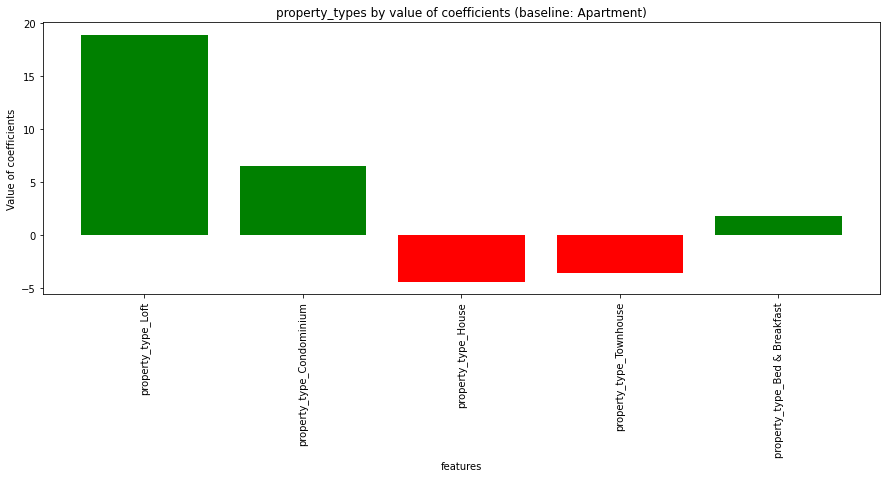

<Figure size 432x288 with 0 Axes>

In [44]:
# investigate property_types
property_type_coefs = coef_df_2[coef_df_2['est_int'].str.contains('property_type')]
plt.figure(figsize = (15,5))
plt.bar(property_type_coefs['est_int'], property_type_coefs['coefs']
        , color=property_type_coefs.positive.map({True: 'green', False: 'red'}))
plt.xlabel('features')
plt.xticks(property_type_coefs['est_int'], rotation = 90)
plt.ylabel('Value of coefficients')
plt.title('property_types by value of coefficients (baseline: Apartment)')
plt.show()
plt.savefig("property type.jpg")

### Question 2: When is the peak season for Airbnb rentals in Seattle? 

In [45]:
# create occupied column 
def get_occupied(df):
    if df['available']==1:
        return False
    else:
        return True
    
df_calendar_1['occupied'] = df_calendar_1.apply(get_occupied, axis=1)
# check data types
# df_calendar_1.dtypes

In [46]:
df_calendar_1.head()

,listing_id,date,available,price,occupied
0,241032,2016-01-04,True,85.0,False
1,241032,2016-01-05,True,85.0,False
2,241032,2016-01-06,False,NaN,True
3,241032,2016-01-07,False,NaN,True
4,241032,2016-01-08,False,NaN,True


In [47]:
df_calendar_1['month'] = df_calendar_1['date'].dt.month

In [48]:
# count the number of occupied and not occupied listings by month
pivot_q2 = pd.pivot_table(df_calendar_1, index='month', values=['listing_id'], columns=['available']
                         , aggfunc={'listing_id': 'count'})
pivot_q2['month'] = pivot_q2.index
pivot_q2['not_occupied'] = pivot_q2.iloc[:,1]
pivot_q2['occupied'] = pivot_q2.iloc[:,0]
pivot_q2

listing_id        month not_occupied occupied
available      False   True                            
month                                                  
1              49603  64937     1        64937    49603
2              37401  73321     2        73321    37401
3              34420  83938     3        83938    34420
4              38503  76037     4        76037    38503
5              38387  79971     5        79971    38387
6              37296  77244     6        77244    37296
7              44136  74222     7        74222    44136
8              42011  76347     8        76347    42011
9              37294  77246     9        77246    37294
10             35920  82438    10        82438    35920
11             32760  81780    11        81780    32760
12             31297  87061    12        87061    31297

In [49]:
# calculate the occupancy rate by month
pivot_q2['occupancy_rate'] = pivot_q2['occupied']/(pivot_q2['occupied']+pivot_q2['not_occupied'])*100
pivot_q2 = pivot_q2[['month','occupancy_rate']].reset_index(drop=True)
pivot_q2.sort_values('occupancy_rate', ascending=False)

,month,occupancy_rate
available,,
0,1,43.306269
6,7,37.290255
7,8,35.494855
1,2,33.779195
3,4,33.615331
5,6,32.561551
8,9,32.559804
4,5,32.432958
9,10,30.348603


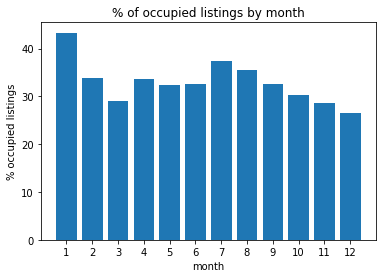

In [50]:
# plot occupancy rate
plt.bar(pivot_q2['month'], pivot_q2['occupancy_rate'])
plt.xlabel('month')
plt.xticks(pivot_q2['month'])
plt.ylabel('% occupied listings')
plt.title('% of occupied listings by month')
plt.savefig("occupancy_rate.jpg")

In [51]:
df_q2 = df_calendar_1.groupby('month').agg(
            average_listing_price = pd.NamedAgg(column='price', aggfunc='mean'))
df_q2 = df_q2.reset_index()
df_q2.sort_values('average_listing_price', ascending=False)

,month,average_listing_price
6,7,152.094150
7,8,150.656594
5,6,147.473137
8,9,143.255949
4,5,139.538183
11,12,137.251835
9,10,137.031939
10,11,135.688738
3,4,135.097005
2,3,128.644488


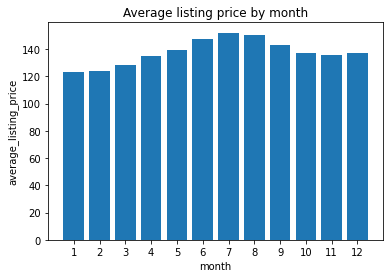

In [52]:
plt.bar(df_q2['month'], df_q2['average_listing_price'])
plt.xlabel('month')
plt.xticks(df_q2['month'])
plt.ylabel('average_listing_price')
plt.title('Average listing price by month')
plt.savefig("average_listing_price.jpg")

### Question 3: Which review criteria contribute the most to overall review ratings?

In [53]:
#df_listings.columns
df_q3 = df_listings[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

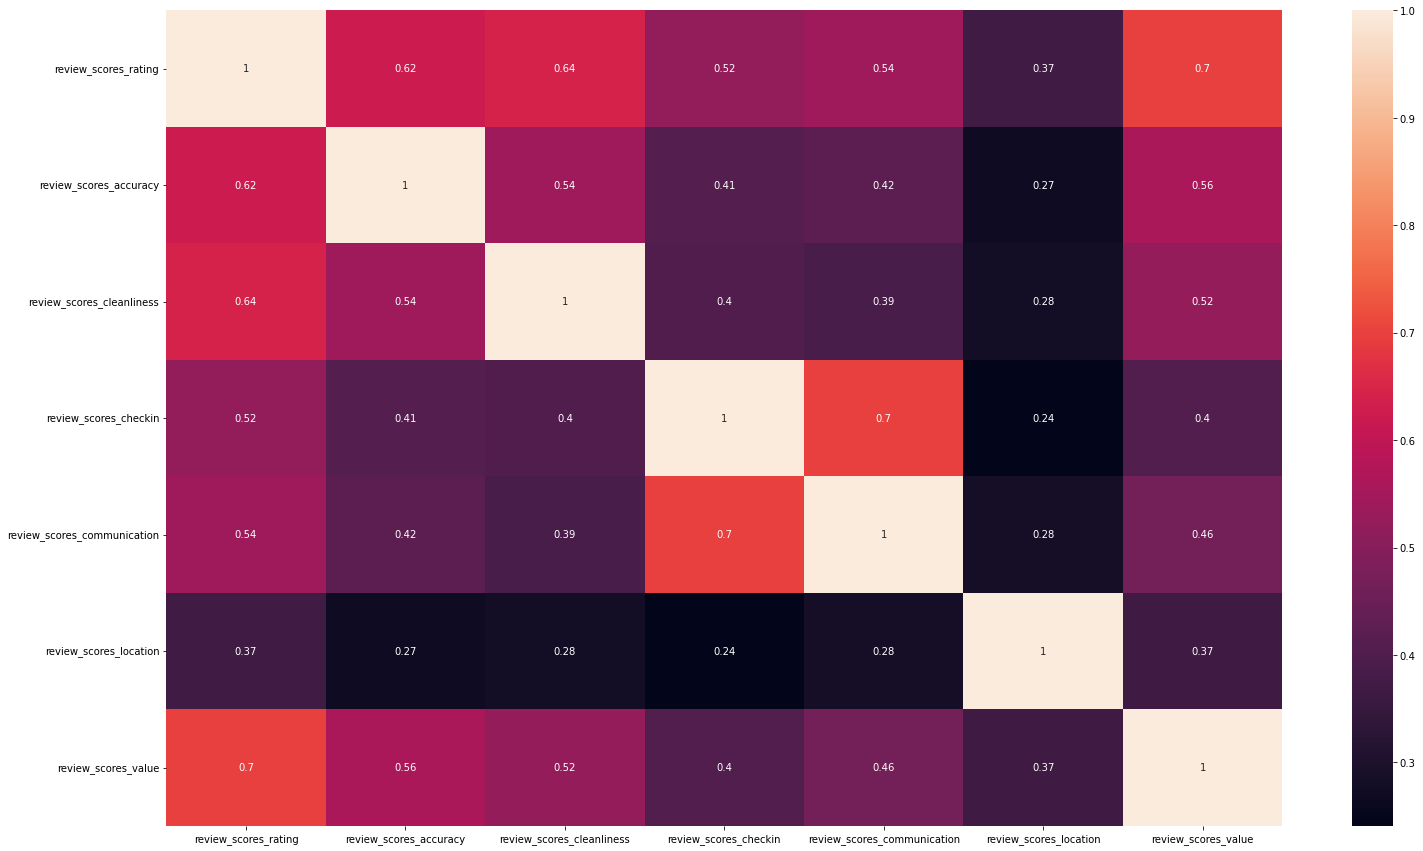

<Figure size 432x288 with 0 Axes>

In [54]:
# correlation heatmap
plt.figure(figsize = (25,15))
dataplot = sns.heatmap(df_q3.corr(), annot=True)
plt.show()
plt.savefig("reviews_ratings.jpg")

Unfinished ideas:

This project was completed as part of Udacity’s Data Scientist nanodegree. Given more time, I would have loved to explore the following:
+ Analyse a larger dataset with more recent data, and compare findings over different years
+ Obtain data on prices of listings when they are booked. This would give a more accurate description of revenue/profit earned by hosts than the current approach, i.e. average daily price advertised on days when they are not booked
+ Engineer features related to location using address data
+ Engage a domain expert for insights on how to deal with outliers
+ Improve the test score of my regression model by using different algorithms